### Machine Learning Utilizing scikit-learn and tensorflow.
#### "Hello, world!" for Machine Learning  ---- Farnam Adelkhani, April 2019
Write one program that can solve many problems, learn from examples and experiences.

Write code to tell the difference between an Apple and an Orange.
    What if photos are black and white... or no apple/orange in photo?
        We'd need a new program and/or tons of rules!
    What is better than this?
        Create a classifier: Function, takes data as input
        
Supervised learning: the act of creating classifiers
    ... think of a classifier as a box of rules.

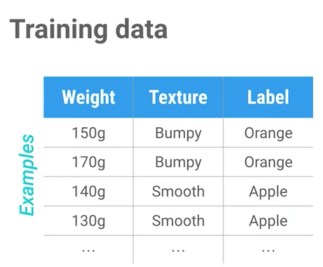

In [1]:
import sklearn
# First 2 columns
features = [[140, "smooth"], [130, "smooth"], [150, "bumpy"], [170, "bumpy"]]
# Last column
labels = ["apple", "apple", "orange", "orange",]

# ---------------------------------------------------------- #

# Change the variable types from string to int
import sklearn
# 0=bumpy  &  1=smooth
features = [[140, 1], [130, 1], [150, 0], [170, 0]]
# 0=apple  &  1=orange
labels = [0, 0, 1, 1]

In [2]:
# Train a classifier, in this case: a decision tree
# Now we can just change the training data, rather than rewriting the func

from sklearn import tree
# 0=bumpy  &  1=smooth
features = [[140, 1], [130, 1], [150, 0], [170, 0]]
# 0=apple  &  1=orange
labels = [0, 0, 1, 1]
clf = tree.DecisionTreeClassifier()
# fit = synonym for 'find patterns in data'
clf = clf.fit(features, labels)

print(clf.predict([[150, 0]]))
# Output will be 0=apple & 1=orange

[1]


In [3]:
# Utilizing iris - the dataset includes table from wikipedia and metadata

from sklearn.datasets import load_iris
iris = load_iris()

# Metadata tells us names of features and names of flower types
print(iris.feature_names)
print(iris.target_names)
print(iris.data[0])

print(iris.target[0])
# Label of 0 means it is a setosa

# To iterate over all 150 entries
for i in range(len(iris.target)):
    print("Example %d: label %s, features %s" % (i, iris.target[i], iris.data[i]))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[5.1 3.5 1.4 0.2]
0
Example 0: label 0, features [5.1 3.5 1.4 0.2]
Example 1: label 0, features [4.9 3.  1.4 0.2]
Example 2: label 0, features [4.7 3.2 1.3 0.2]
Example 3: label 0, features [4.6 3.1 1.5 0.2]
Example 4: label 0, features [5.  3.6 1.4 0.2]
Example 5: label 0, features [5.4 3.9 1.7 0.4]
Example 6: label 0, features [4.6 3.4 1.4 0.3]
Example 7: label 0, features [5.  3.4 1.5 0.2]
Example 8: label 0, features [4.4 2.9 1.4 0.2]
Example 9: label 0, features [4.9 3.1 1.5 0.1]
Example 10: label 0, features [5.4 3.7 1.5 0.2]
Example 11: label 0, features [4.8 3.4 1.6 0.2]
Example 12: label 0, features [4.8 3.  1.4 0.1]
Example 13: label 0, features [4.3 3.  1.1 0.1]
Example 14: label 0, features [5.8 4.  1.2 0.2]
Example 15: label 0, features [5.7 4.4 1.5 0.4]
Example 16: label 0, features [5.4 3.9 1.3 0.4]
Example 17: label 0, features [5.1 3.5 1.4 0.3]
Example

In [4]:
# Train a classifier - 1st split the data

import numpy as np
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
test_idx = [0,50,100]

# Training data:
train_target = np.delete(iris.target, test_idx)
train_data = np.delete(iris.data, test_idx, axis=0)

# Testing data: (Just contains examples that were removed)
test_target = iris.target[test_idx]
test_data = iris.data[test_idx]

# Import classifier and train on data
clf = tree.DecisionTreeClassifier()
clf.fit(train_data, train_target)

print(test_target)
print(clf.predict(test_data))
# If predicted labels match testing data = that means all is correct

[0 1 2]
[0 1 2]


In [ ]:
# Visualize the tree to see how classifier works.

from sklearn.externals.six import StringIO
import pydot
dot_data = StringIO()
tree.export_graphviz(clf,
                        out_file=dot_data,
                        feature_names=iris.feature_names,
                        class_names=iris.target_names,
                        filled=True, rounded=True,
                        impurity=False)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_pdf("iris.pdf") 

# Use this format to run terminal commands in Jupyter Notebook
# ! open -a preview iris.pdf

Output from cell above:
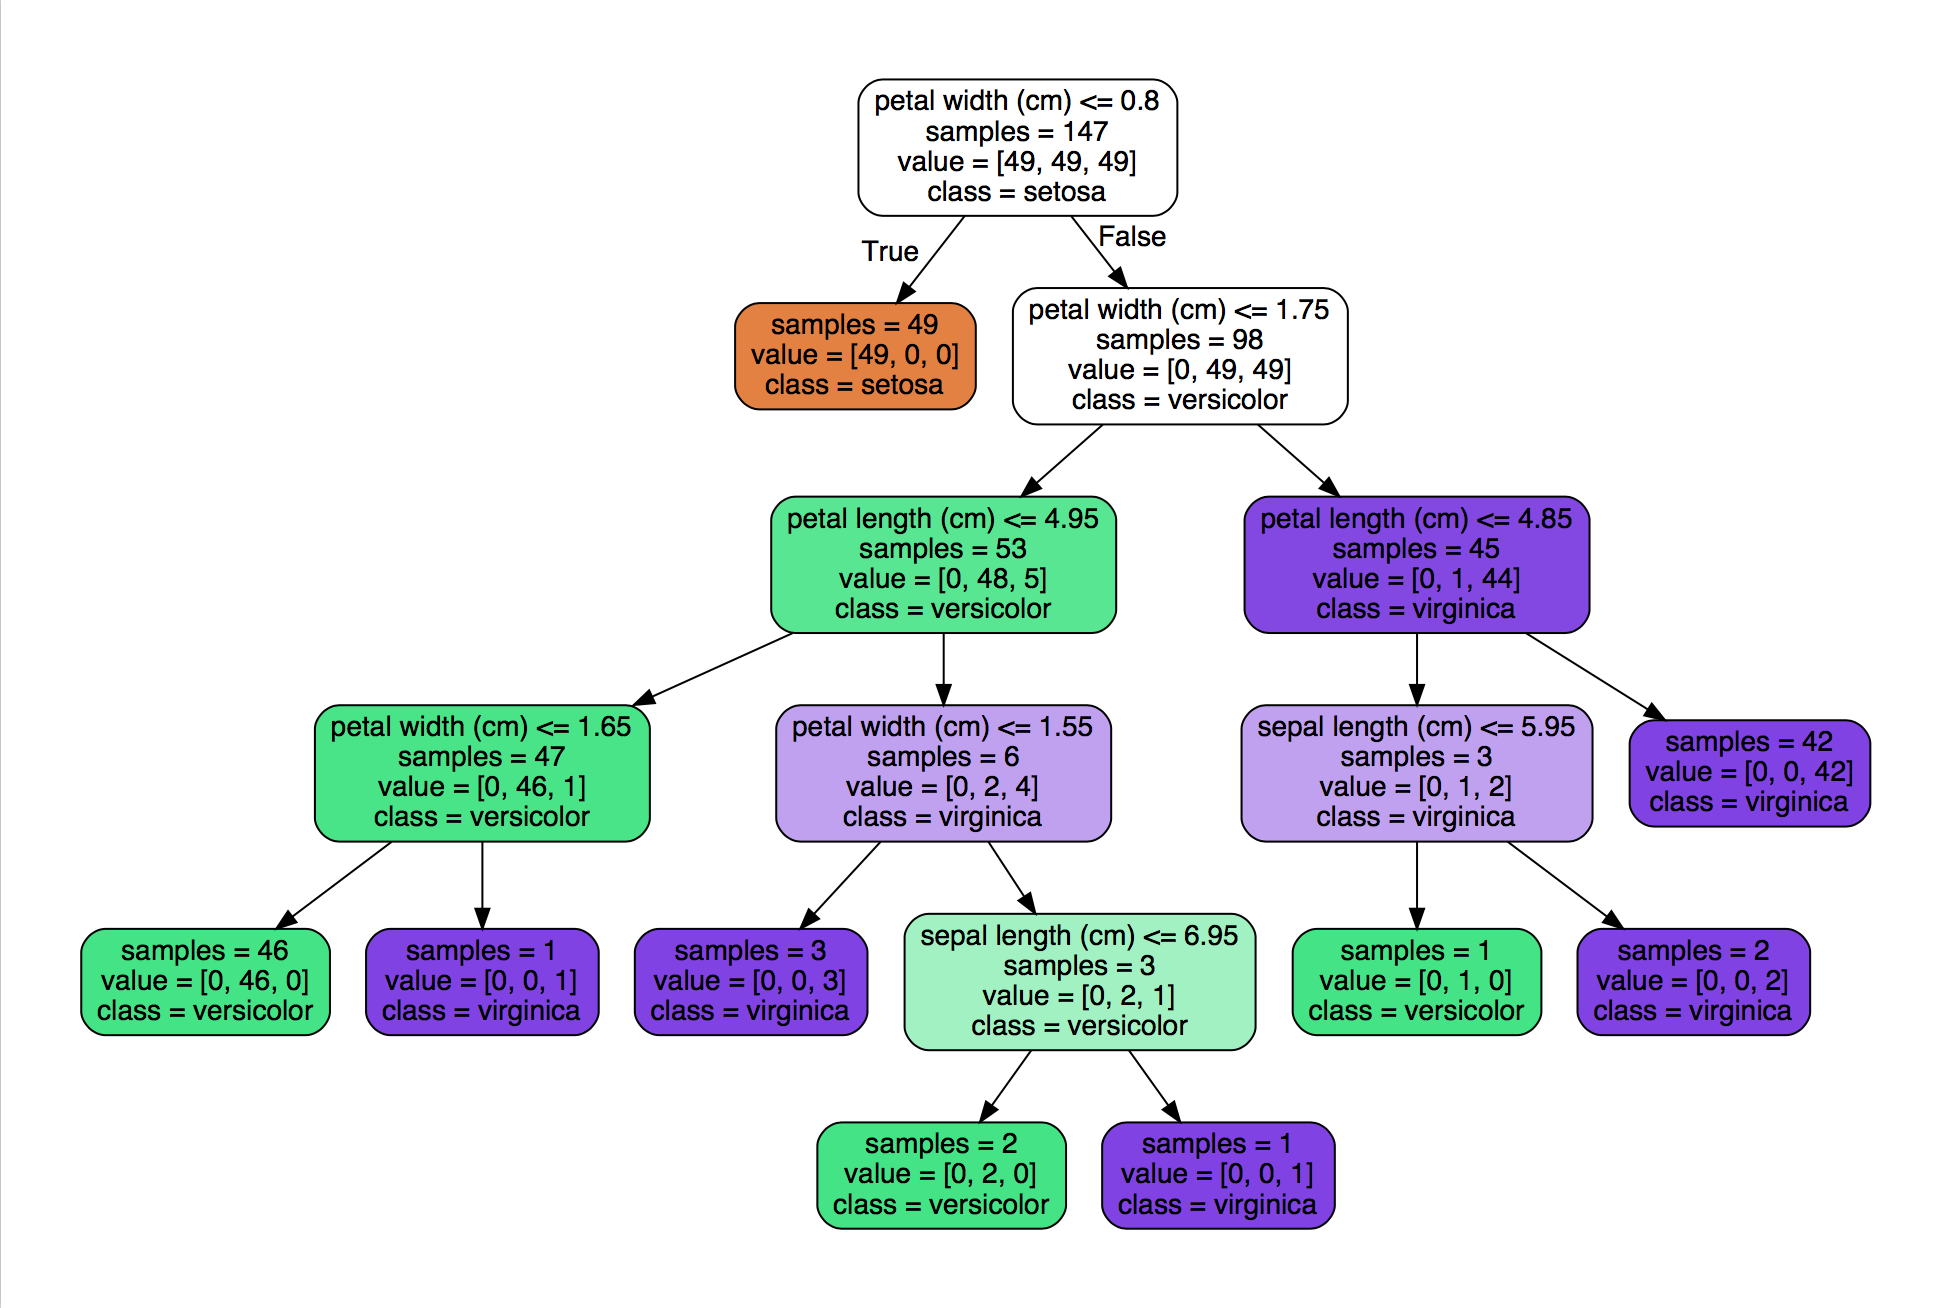

In [ ]:
# Change 0-->1 to test second example.
print(test_data[0], test_target[0])
print(test_data[1], test_target[1])
print(test_data[2], test_target[2])

print(iris.feature_names, iris.target_names)

# Next up... how decision trees are automatically generated from examples.

[5.1 3.5 1.4 0.2] 0
[7.  3.2 4.7 1.4] 1
[6.3 3.3 6.  2.5] 2
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']


<pre>Classifiers are only as good as the features you provide!
Therefor, providing good features is critical.

IE: In a binary classifier, 0/1 should represent clearly defined differences.</pre>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

greyhounds = 500
labs = 500

# Average height of dog +/- 4 inches
grey_height = 28 + 4 * np.random.randn(greyhounds)
lab_height = 24 + 4 * np.random.randn(labs)

# greyHounds=red & labs=blue
plt.hist([grey_height, lab_height], stacked=True, color=['r','b'])
plt.show()

! python

<Figure size 640x480 with 1 Axes>

<pre>From the output of the prior cell:
- Depending on the height of the dog, it is possible to make an accurate prediction, if the feature data is relevant.
- Towards the middle of the graph, it is not possible to make a useful prediction, since the probabilities are roughly equal.
- Adding more features, which are useful, would be a good idea.
    ie: eye color may not correlate with type of dog.
- Maintain independent features, ie: don't include height in cm and inch.
</pre>

Let's write a pipline for supervised learning.
- How multiple classifiers can solve the same problem.
- What does it mean for an algorithm to learn something from data?

In [ ]:
# Import a dataset
from sklearn import datasets
iris = datasets.load_iris()

# Feature--> f(x)=y <--Label
X = iris.data
y = iris.target

# Import the data, then partition into 1. _train and 2. _test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .5)

# Creating the classifier - Note: Only 2 lines of code are classifier specific
from sklearn import tree
my_classifier = tree.DecisionTreeClassifier()

# Use training data on classifier
my_classifier.fit(X_train, y_train)

# Use predict method to classify test data
predictions = my_classifier.predict(X_test)
print(predictions)

# To find accuracy, compare predicted labels to true values
from sklearn.metrics import accuracy_score
# In this case, accuracy should be ~%90
print(accuracy_score(y_test, predictions))

In [ ]:
# *Using a different classifier, KNeighbor* - Otherwise the same.
# Note: the accuracy may be higher since this classifer works differently.
# In my case, went from: 0.906 -> 0.946 accuracy.

# Import a dataset
from sklearn import datasets
iris = datasets.load_iris()

# Feature--> f(x)=y <--Label
X = iris.data
y = iris.target

# Import the data, then partition into 1. _train and 2. _test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .5)

# Utilizing KNeighbor classifier this time...
from sklearn.neighbors import KNeighborsClassifier
my_classifier = KNeighborsClassifier()

# Use training data on classifier
my_classifier.fit(X_train, y_train)

# Use predict method to classify test data
predictions = my_classifier.predict(X_test)
print(predictions)

# To find accuracy, compare predicted labels to true values
from sklearn.metrics import accuracy_score
# In this case, accuracy should be ~%90
print(accuracy_score(y_test, predictions))

### Take away from prior cells: Although there are different types of classifiers, they can be implemented in the same way.

<pre>In programming, we define a function as:

    def classify(features):
        # do some logic
        return label
        
*In supervised learning we do NOT want to write this function.
    ... we want an algorithm to learn it from training data.</pre>

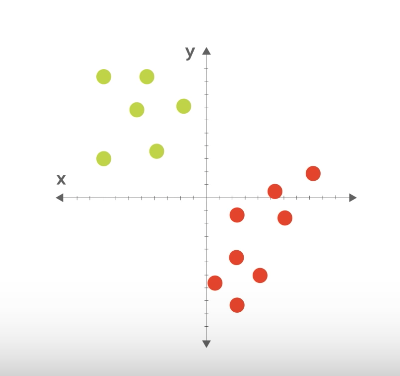

Pretend you want to distinguish between the red and green dots.
- Just use 2 features: X and Y coordinate of the dot.

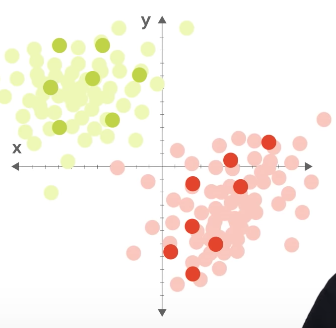
How can we predict these dots which were not in our training data.

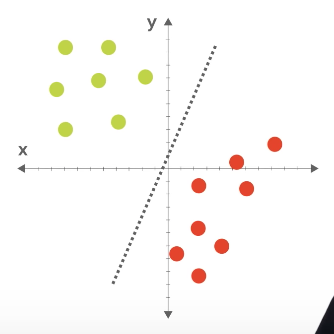
Let's draw a line and say all dots to either side are red or green.

Approach: Use training data to adjust the parameters of the model.

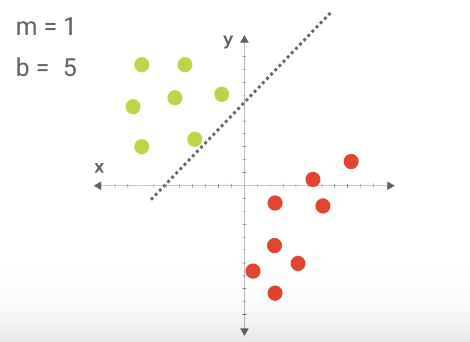
By adjusting the parameters of m and b, we can move the line as we learn the correct parameters.

Important: As we introduce each new dot, we can adjust the parameters of a model. 
- If the model gets it correct, no need to make changes.
- If the model gets it wrong, adjust the parameters of the model. Then move on to the next one.

Take away: One way to think of learning is to use training data to adjust the parameters of a model.

### Writing our first classifier from scratch
Will be similar to KNearestNeighbors classifier (One of the most basic classifiers)

In [ ]:
# Previously we imported the classifier from a library.
# ... this time, we will write our own.

import random

# Implement a class for our classifier:
class ScrappyKNN():
    def fit(self, X_train, y_train):
        # Store the training data in this class.
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        predicitons = []
        for row in X_test:
            label = random.choice(self.y_train)
            predictions.append(label)
        
        return predictions

# Import a dataset
from sklearn import datasets
iris = datasets.load_iris()

# Feature--> f(x)=y <--Label
X = iris.data
y = iris.target

# Import the data, then partition into 1. _train and 2. _test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .5)

# Comment out our classifier and write our own...
# from sklearn.neighbors import KNeighborsClassifier

# Change our pipeline to use our new classifier
# my_classifier = KNeighborsClassifier()
my_classifier = ScrappyKNN()

# Use training data on classifier
my_classifier.fit(X_train, y_train)

# Use predict method to classify test data
# predictions = my_classifier.predict(X_test)
# print(predictions)

# To find accuracy, compare predicted labels to true values
from sklearn.metrics import accuracy_score
# In this case, accuracy should be ~%90
print(accuracy_score(y_test, predictions))

In the example above, we acheive an accuracy of ~30%... let's try to improve upon this...

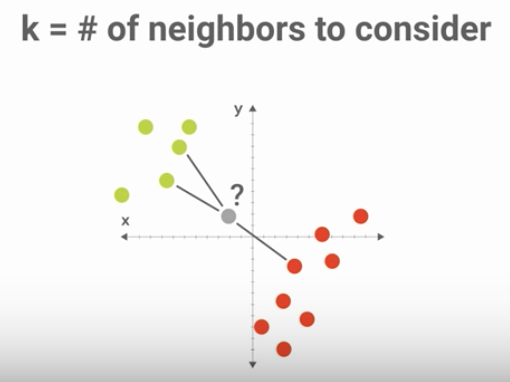

Let's use the idea of utilizing the color of the nearest neighbor, or neighbors, to determine the color.
... use the formula for euclidean distance to find the nearest neighbor.

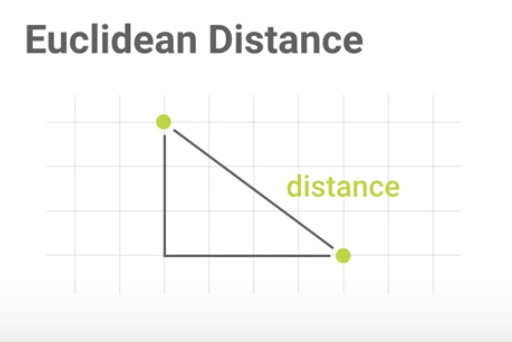
The distance that we compute is just the length of the hypotenuse.

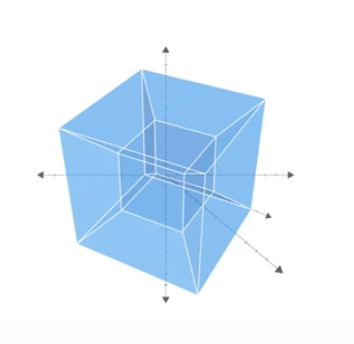
If we have 4 or more features, we have a hybrid cube and visualization becomes difficult, but the euclidean distance works in the same way.

In [ ]:
# Previously we imported the classifier from a library.
# ... this time, we will write our own.

from scipy.spatial import distance

# a=trainingPoint & b=testingPoint
def euc(a,b):
    return distance.euclidean(a,b)

# Implement a class for our classifier:
class ScrappyKNN():
    def fit(self, X_train, y_train):
        # Store the training data in this class
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        predicitons = []
        for row in X_test:
            # Method to find the closest point
            label = self.closest(row)
            predictions.append(label)
        
        return predictions
    
    # Loop over all training points and keep track of nearest ones, so far
    def closest(self, row):
        #calc dist from train point to nearest test point
        best_dist = euc(row, self.X_train[0])
        # Keep track of index of closest point
        best_index = 0
        # Iterate over all other training points and update when you find a closer one
        for i in range(1, len(self.X_train)):
            dist = euc(row, self.X_train[i])
            if dist < best.dist:
                best_dist = dist
                # use index to return the closest point
                best_index = i
                
            return self.y_train[best_index]

# Import a dataset
from sklearn import datasets
iris = datasets.load_iris()

# Feature--> f(x)=y <--Label
X = iris.data
y = iris.target

# Import the data, then partition into 1. _train and 2. _test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .5)

# Comment out our classifier and write our own...
# from sklearn.neighbors import KNeighborsClassifier

# Change our pipeline to use our new classifier
# my_classifier = KNeighborsClassifier()
my_classifier = ScrappyKNN()

# Use training data on classifier
my_classifier.fit(X_train, y_train)

# Use predict method to classify test data
# predictions = my_classifier.predict(X_test)
# print(predictions)

# To find accuracy, compare predicted labels to true values
from sklearn.metrics import accuracy_score
# In this case, accuracy should be ~%90
print(accuracy_score(y_test, predictions))

Pros:
    Simplicity
    
Cons:
    Computationally intensive
    Hard to represent relationships between features

Credits: Josh Gordon from Google Developers Program